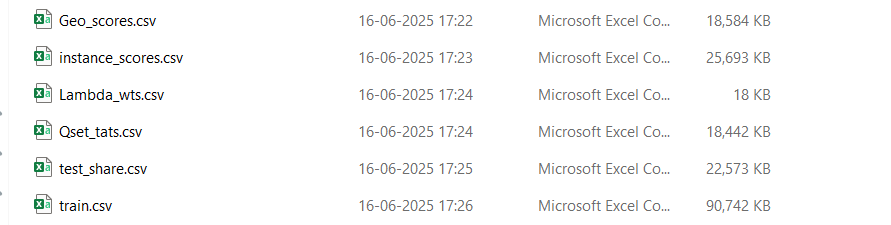

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
geo = pd.read_csv('Geo_scores.csv')
instance = pd.read_csv('instance_scores.csv')
lamda = pd.read_csv('Lambda_wts.csv')
qset = pd.read_csv('Qset_tats.csv')
test = pd.read_csv('test_share.csv')
train = pd.read_csv('train.csv')

In [3]:
print(geo.shape)
print("***************")  
print(instance.shape)
print("***************")  
print(lamda.shape)
print("***************")  
print(qset.shape)
print("***************")  
print(test.shape)
print("***************")  
print(train.shape)
print("***************")  

(1424035, 2)
***************
(1424035, 2)
***************
(1400, 2)
***************
(1424035, 2)
***************
(56962, 27)
***************
(227845, 28)
***************


In [4]:
print(geo.head(2))
print("***************")  
print(instance.head(2))
print("***************")  
print(lamda.head(2))
print("***************")  
print(qset.head(2))
print("***************")  
print(test.head(2))
print("***************")  
print(train.head(2))
print("***************")  

       id  geo_score
0   26674       4.48
1  204314       4.48
***************
       id  instance_scores
0  173444            -0.88
1  259378             1.50
***************
    Group  lambda_wt
0  Grp936       3.41
1  Grp347      -2.88
***************
       id  qsets_normalized_tat
0    9983                  2.41
1  266000                  3.10
***************
       id   Group      Per1      Per2  Per3      Per4  Per5      Per6  Per7  \
0  146574  Grp229 -0.300000  1.540000  0.22 -0.280000  0.57  0.260000  0.70   
1  268759  Grp141  0.633333  0.953333  0.81  0.466667  0.91  0.253333  1.04   

       Per8  ...      Dem7      Dem8      Dem9     Cred1     Cred2     Cred3  \
0  1.076667  ...  0.786667  0.546667  0.313333  0.703333  0.813333  0.776667   
1  0.550000  ...  0.636667  0.770000  0.993333  0.536667  0.703333  0.806667   

      Cred4     Cred5     Cred6  Normalised_FNT  
0  0.796667  0.823333  0.783333       -249.7500  
1  0.630000  0.673333  0.673333       -249.8125  

[2 

In [5]:
print(geo.info())
print("***************")  
print(instance.info())
print("***************")  
print(lamda.info())
print("***************")  
print(qset.info())
print("***************")  
print(test.info())
print("***************")  
print(train.info())
print("***************")  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424035 entries, 0 to 1424034
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   id         1424035 non-null  int64  
 1   geo_score  1352492 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 21.7 MB
None
***************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424035 entries, 0 to 1424034
Data columns (total 2 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   id               1424035 non-null  int64  
 1   instance_scores  1424035 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 21.7 MB
None
***************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Group      1400 non-null   object 
 1   lambda_wt  1400 non-null   float64
dtypes

In [6]:
print(geo.isnull().sum())
print("***************")  
print(instance.isnull().sum())
print("***************")  
print(lamda.isnull().sum())
print("***************")  
print(qset.isnull().sum())
print("***************")  
print(test.isnull().sum())
print("***************")  
print(train.isnull().sum())
print("***************")  

id               0
geo_score    71543
dtype: int64
***************
id                 0
instance_scores    0
dtype: int64
***************
Group        0
lambda_wt    0
dtype: int64
***************
id                           0
qsets_normalized_tat    103201
dtype: int64
***************
id                0
Group             0
Per1              0
Per2              0
Per3              0
Per4              0
Per5              0
Per6              0
Per7              0
Per8              0
Per9              0
Dem1              0
Dem2              0
Dem3              0
Dem4              0
Dem5              0
Dem6              0
Dem7              0
Dem8              0
Dem9              0
Cred1             0
Cred2             0
Cred3             0
Cred4             0
Cred5             0
Cred6             0
Normalised_FNT    0
dtype: int64
***************
id                0
Group             0
Per1              0
Per2              0
Per3              0
Per4              0
Per5              0
Per

In [7]:
print("***********Unique ID to the customer")
print("geo:",geo['id'].nunique())
print("***************")  
print("instance:",instance['id'].nunique())
print("***************")  
print("qset:",qset['id'].nunique())
print("***************")  
print("test:",test['id'].nunique())
print("***************")  
print("train:",train['id'].nunique())
print("***************")  
print("***********Unique Group to the customer")
print("***************")  
print("lamda:",lamda['Group'].nunique())
print("***************")  
print("test:",test['Group'].nunique())
print("***************")  
print("train:",train['Group'].nunique())

***********Unique ID to the customer
geo: 284807
***************
instance: 284807
***************
qset: 284807
***************
test: 56962
***************
train: 227845
***************
***********Unique Group to the customer
***************
lamda: 1400
***************
test: 915
***************
train: 1301


In [8]:
test.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem7,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT
0,146574,Grp229,-0.300000,1.540000,0.220000,-0.280000,0.570000,0.260000,0.700000,1.076667,...,0.786667,0.546667,0.313333,0.703333,0.813333,0.776667,0.796667,0.823333,0.783333,-249.7500
1,268759,Grp141,0.633333,0.953333,0.810000,0.466667,0.910000,0.253333,1.040000,0.550000,...,0.636667,0.770000,0.993333,0.536667,0.703333,0.806667,0.630000,0.673333,0.673333,-249.8125
2,59727,Grp188,1.043333,0.740000,0.860000,1.006667,0.583333,0.616667,0.630000,0.686667,...,0.626667,0.756667,0.953333,0.623333,0.753333,0.870000,0.596667,0.680000,0.670000,-248.1200
3,151544,Grp426,1.283333,0.300000,0.576667,0.636667,0.256667,0.543333,0.356667,0.663333,...,0.480000,0.460000,0.260000,0.800000,0.606667,0.456667,0.320000,0.676667,0.660000,-222.9875
4,155008,Grp443,1.186667,0.326667,0.476667,0.866667,0.436667,0.680000,0.476667,0.686667,...,0.706667,0.740000,0.823333,0.670000,0.896667,0.566667,0.546667,0.650000,0.663333,-196.2200


In [9]:
print(geo.isnull().sum()/len(geo)*100)
print("***************")  
print(qset.isnull().sum()/len(qset)*100)
print("***************")  

id           0.000000
geo_score    5.023964
dtype: float64
***************
id                      0.000000
qsets_normalized_tat    7.247083
dtype: float64
***************


In [10]:
geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424035 entries, 0 to 1424034
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   id         1424035 non-null  int64  
 1   geo_score  1352492 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 21.7 MB


<Axes: ylabel='geo_score'>

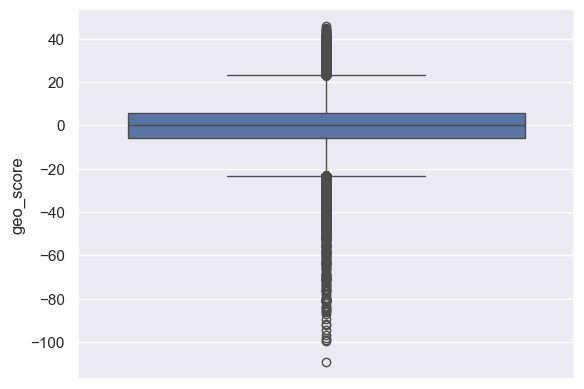

In [11]:
sns.boxplot(y='geo_score', data=geo)

In [12]:
qset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424035 entries, 0 to 1424034
Data columns (total 2 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1424035 non-null  int64  
 1   qsets_normalized_tat  1320834 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 21.7 MB


<Axes: ylabel='qsets_normalized_tat'>

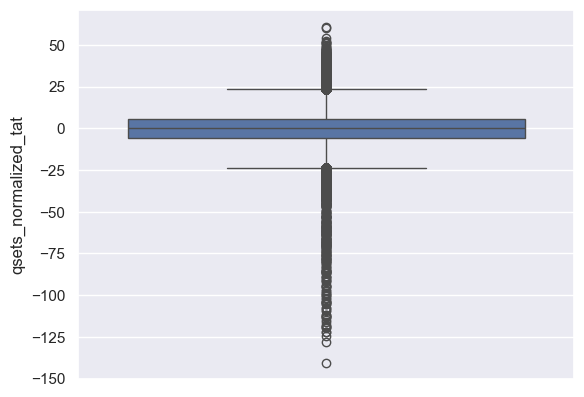

In [13]:
sns.boxplot(y='qsets_normalized_tat', data=qset)

In [14]:
# Handling the missing values
geo['geo_score'] = geo['geo_score'].fillna(geo['geo_score'].median())
qset['qsets_normalized_tat'] = qset['qsets_normalized_tat'].fillna(qset['qsets_normalized_tat'].median())

In [15]:
# Checking After Handling The Missing Values
print(geo.isnull().sum()/len(geo)*100)
print("***************")  
print(qset.isnull().sum()/len(qset)*100)
print("***************")  

id           0.0
geo_score    0.0
dtype: float64
***************
id                      0.0
qsets_normalized_tat    0.0
dtype: float64
***************


In [16]:
train['data'] = 'train'
test['data'] = 'test'

In [17]:
all_data = pd.concat([train,test], axis=0)

In [18]:
all_data.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.726667,0.606667,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0.0,train
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.743333,0.680000,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,0.0,train
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.820000,0.600000,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,0.0,train
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.900000,0.680000,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0.0,train
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.486667,0.693333,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0.0,train


In [19]:
print("***********Unique ID to the customer")
print("geo:",geo['id'].nunique())
print("***************")  
print("instance:",instance['id'].nunique())
print("***************")  
print("qset:",qset['id'].nunique())
print("***************")  
print("all_data:",all_data['id'].nunique())
print("***************")  
print("***********Unique Group to the customer")
print("***************")  
print("lamda:",lamda['Group'].nunique())
print("***************")  
print("all_data:",all_data['Group'].nunique())

***********Unique ID to the customer
geo: 284807
***************
instance: 284807
***************
qset: 284807
***************
all_data: 284807
***************
***********Unique Group to the customer
***************
lamda: 1400
***************
all_data: 1400


In [20]:
geo.shape

(1424035, 2)

In [21]:
instance.shape

(1424035, 2)

In [22]:
qset.shape

(1424035, 2)

In [24]:
qset.describe()

,id,qsets_normalized_tat
count,1.424035e+06,1.424035e+06
mean,1.424030e+05,1.459564e-03
std,8.221673e+04,7.446362e+00
min,0.000000e+00,-1.404400e+02
25%,7.120100e+04,-5.170000e+00
50%,1.424030e+05,2.000000e-02
75%,2.136050e+05,5.170000e+00
max,2.848060e+05,6.110000e+01


In [25]:
instance.describe()

,id,instance_scores
count,1.424035e+06,1.424035e+06
mean,1.424030e+05,-2.879143e-06
std,8.221673e+04,2.544506e+00
min,0.000000e+00,-1.231900e+02
25%,7.120100e+04,-6.400000e-01
50%,1.424030e+05,-4.000000e-02
75%,2.136050e+05,5.900000e-01
max,2.848060e+05,1.203500e+02


In [26]:
geo.describe()

,id,geo_score
count,1.424035e+06,1.424035e+06
mean,1.424030e+05,9.034321e-03
std,8.221673e+04,7.628149e+00
min,0.000000e+00,-1.093900e+02
25%,7.120100e+04,-5.170000e+00
50%,1.424030e+05,1.800000e-01
75%,2.136050e+05,5.170000e+00
max,2.848060e+05,4.581000e+01


In [27]:
geo = geo.groupby('id').mean()
instance = instance.groupby('id').mean()
qset = qset.groupby('id').mean()

In [28]:
geo.shape

(284807, 1)

In [29]:
instance.shape

(284807, 1)

In [30]:
qset.shape

(284807, 1)

In [31]:
all_data = pd.merge(all_data, lamda, on='Group', how='left')

In [32]:
all_data.shape

(284807, 30)

In [33]:
all_data = pd.merge(all_data, geo, on='id', how='left')

In [34]:
all_data.shape

(284807, 31)

In [35]:
all_data = pd.merge(all_data, instance, on='id', how='left')

In [36]:
all_data.shape

(284807, 32)

In [37]:
all_data = pd.merge(all_data, qset, on='id', how='left')

In [38]:
all_data.shape

(284807, 33)

In [39]:
all_data.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred4,Cred5,Cred6,Normalised_FNT,Target,data,lambda_wt,geo_score,instance_scores,qsets_normalized_tat
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.603333,0.686667,0.673333,-245.7500,0.0,train,-0.13,0.256,-0.06,-0.700
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.670000,0.553333,0.653333,-248.0000,0.0,train,0.66,-0.250,0.52,0.140
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.670000,0.686667,0.673333,-233.1250,0.0,train,-0.51,-0.950,1.56,-0.430
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.520000,0.846667,0.760000,-249.7775,0.0,train,0.72,0.490,0.70,-0.302
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.716667,0.706667,0.673333,-247.5775,0.0,train,0.60,0.850,-0.47,-0.630


# EDA

In [42]:
from ydata_profiling import ProfileReport
reports = ProfileReport(all_data)
reports.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 33/33 [00:04<00:00,  8.19it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [43]:
train = all_data[all_data['data'] == 'train']
test = all_data[all_data['data'] == 'test']

In [44]:
train.shape

(227845, 33)

In [45]:
test.shape

(56962, 33)

In [46]:
train.columns

Index(['id', 'Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7',
       'Per8', 'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7',
       'Dem8', 'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6',
       'Normalised_FNT', 'Target', 'data', 'lambda_wt', 'geo_score',
       'instance_scores', 'qsets_normalized_tat'],
      dtype='object')

In [47]:
train = train.drop(['id','data'],axis=1) # Building a Model
test = test.drop(['id','data'], axis=1) # Prediction and Final Result 

In [48]:
test.columns

Index(['Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7', 'Per8',
       'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7', 'Dem8',
       'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6',
       'Normalised_FNT', 'Target', 'lambda_wt', 'geo_score', 'instance_scores',
       'qsets_normalized_tat'],
      dtype='object')

In [49]:
unseen_data_test = test.copy()

In [50]:
unseen_data_test['Group'] = unseen_data_test['Group'].astype('category')
unseen_data_test['Group'] = unseen_data_test['Group'].cat.codes
unseen_data_test['Group']

227845    277
227846    180
227847    231
227848    485
227849    504
         ... 
284802     11
284803    569
284804    765
284805    163
284806    222
Name: Group, Length: 56962, dtype: int16

In [51]:
train['Group'] = train['Group'].astype('category')
train['Group'] = train['Group'].cat.codes
train['Group']

0         420
1         413
2         523
3         452
4         486
         ... 
227840    491
227841    453
227842    632
227843    727
227844    393
Name: Group, Length: 227845, dtype: int16

In [52]:
test = test.drop(['Target'], axis=1)

In [53]:
# Split The Data into ind and dep variable 
x = train.drop(['Target'], axis=1)
y = train['Target']

In [54]:
# Split the data into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=101,stratify=y)

In [55]:
# Building Model
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [56]:
y_pred_train = rf_model.predict(x_train)
y_pred_test = rf_model.predict(x_test)

In [57]:
from sklearn.metrics import classification_report, accuracy_score

In [58]:
print("Classification_Report :",classification_report(y_train, y_pred_train))
print("**********************")
print("Classification_Report :",classification_report(y_test, y_pred_test))

Classification_Report :               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    181961
         1.0       1.00      1.00      1.00       315

    accuracy                           1.00    182276
   macro avg       1.00      1.00      1.00    182276
weighted avg       1.00      1.00      1.00    182276

**********************
Classification_Report :               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45490
         1.0       0.95      0.72      0.82        79

    accuracy                           1.00     45569
   macro avg       0.97      0.86      0.91     45569
weighted avg       1.00      1.00      1.00     45569



In [59]:
print("Training Accuracy:",accuracy_score(y_train,y_pred_train))
print("**********************")
print("Test Accuracy:",accuracy_score(y_test,y_pred_test))

Training Accuracy: 0.9999945138142158
**********************
Test Accuracy: 0.9994513814215804


In [103]:
from sklearn.metrics import roc_curve, roc_auc_score

In [105]:
print("ROC-AUC Score:", roc_auc_score(y_test, rf_model.predict_proba(x_test)[:, 1]))

ROC-AUC Score: 0.934453809572837


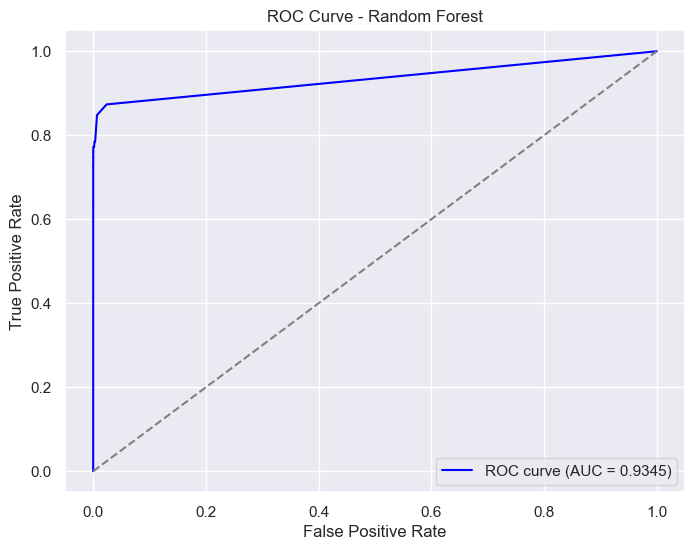

In [107]:
y_probs = rf_model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)
# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (AUC = {:.4f})'.format(auc_score))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random model line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [60]:
unseen_data_test = unseen_data_test.drop(['Target'], axis=1)

In [61]:
final_output = rf_model.predict(unseen_data_test)

In [62]:
unseen_data_test.columns

Index(['Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7', 'Per8',
       'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7', 'Dem8',
       'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6',
       'Normalised_FNT', 'lambda_wt', 'geo_score', 'instance_scores',
       'qsets_normalized_tat'],
      dtype='object')

In [63]:
final_output

array([0., 0., 0., ..., 0., 0., 0.])

In [64]:
final_output = pd.DataFrame(final_output)
final_output.columns

RangeIndex(start=0, stop=1, step=1)

In [65]:
final_output.to_csv("Final_Target_Value.csv")